In [13]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from scipy import linalg
%matplotlib inline

def show_gradient_descent(A, b):
#  enter your code here, and remove the following line (30%)
    
    x = np.array([-2, 2]) # Initial condition
    x2 = np.array([-1, 1])  # Additional initial point
    alpha = 0.02 # Learning rate 
    max_iter = 1000
    #x_path = []
    x_path = np.empty((0,3))
    x2_path = np.empty((0, 3))

    for k in range(max_iter):
        Ax = np.dot(A, x)
        #print(Ax)
        #print(Ax-b.T)
        Axb=Ax-b.T
        Axb = Ax - b.T  # Objective function value
        #print(Axb)
        f=np.linalg.norm(Axb)**2
        print(f"{k}: x = {x}, f(x) = {f:.2f}")
        xxx = np.concatenate([x, np.array([f])])
        #print(xxx)
        x_path = np.vstack([x_path, xxx])

        
        grad = 2 * np.dot(A.T, Axb.T)  # Gradient 
        #print("g")
        #print(grad)
        #print("111111111")
        x_prev = x
        #print("1",x,"1")
        x = x - alpha * grad.T  # Gradient descent update
    
        x=x.T
        x=np.squeeze(x)
        #print("222",x,"222")
        # Check convergence
        #print("con",np.linalg.norm(x - x_prev))
        if np.linalg.norm(x - x_prev) <= 1e-8:
            
            break
        
        # For x2
        Ax2 = np.dot(A, x2)
        Axb2 = Ax2 - b.T  # Objective function value
        f2 = np.linalg.norm(Axb2) ** 2
        xxx2 = np.concatenate([x2, np.array([f2])])
        x2_path = np.vstack([x2_path, xxx2])
        grad2 = 2 * np.dot(A.T, Axb2.T)  # Gradient
        x2_prev = x2
        x2 = x2 - alpha * grad2.T  # Gradient descent update
        x2 = x2.T
        x2 = np.squeeze(x2)
        if np.linalg.norm(x2 - x2_prev) <= 1e-8:
            break




    
            
    print(f"\nMinimum found at x = {x}")
    return x_path[:k+1],x2_path[:k+1],x,x2
pass

In [14]:
def draw_gradient_descent(A, b):
  xx, yy = np.meshgrid(np.arange(-2,2.1,0.1), np.arange(-2,2.1,0.1))
  F1 = A[0][0]*xx + A[0][1]*yy - b[0];
  F2 = A[1][0]*xx + A[1][1]*yy - b[1];
  zz = F1*F1 + F2*F2;
   #plt3d = plt.figure().gca(projection='3d')
  plt3d = plt.figure().add_subplot(projection='3d')
  plt3d.plot_surface(xx, yy, zz, alpha=0.7, cmap=cm.coolwarm)
    
#  enter your code here (14%)
  plt3d = plt.gca()
  x_path, x2_path, x1_final, x2_final = show_gradient_descent(A, b)
  #zp = None

  

  plt3d.scatter(x_path[:, 0], x_path[:, 1], x_path[:, 2], c='r', marker='o', label='Gradient Descent')
    
  print("*********")
  print(x_path)
  print(x2_path)
  print("*********")
    
  #extended_path = np.vstack([x_path[-1], x2_path[-1]])
  #plt3d.plot(extended_path[:, 0], extended_path[:, 1], extended_path[:, 2], color='blue', label='Extended Path')

  # 任意給定兩點
  P1 = x_path[-1]
  P2 = x2_path[-1]

  # 計算斜率和截距
  m = (P2[1] - P1[1]) / (P2[0] - P1[0])
  b = P1[1] - m * P1[0]

  # 定義直線方程式
  def line_equation(x):
    return m * x + b

  # ru; 將連線延長
  x_values = np.array([-2, 2])
  y_values = line_equation(x_values)


  plt.plot(x_values, y_values, label='Line')

  plt.legend()
  plt.show()

0: x = [-2  2], f(x) = 113.00
1: x = [-1.4  0.8], f(x) = 41.00
2: x = [-1.04  0.08], f(x) = 15.08
3: x = [-0.824 -0.352], f(x) = 5.75
4: x = [-0.6944 -0.6112], f(x) = 2.39
5: x = [-0.61664 -0.76672], f(x) = 1.18
6: x = [-0.569984 -0.860032], f(x) = 0.74
7: x = [-0.5419904 -0.9160192], f(x) = 0.59
8: x = [-0.52519424 -0.94961152], f(x) = 0.53
9: x = [-0.51511654 -0.96976691], f(x) = 0.51
10: x = [-0.50906993 -0.98186015], f(x) = 0.50
11: x = [-0.50544196 -0.98911609], f(x) = 0.50
12: x = [-0.50326517 -0.99346965], f(x) = 0.50
13: x = [-0.5019591  -0.99608179], f(x) = 0.50
14: x = [-0.50117546 -0.99764908], f(x) = 0.50
15: x = [-0.50070528 -0.99858945], f(x) = 0.50
16: x = [-0.50042317 -0.99915367], f(x) = 0.50
17: x = [-0.5002539 -0.9994922], f(x) = 0.50
18: x = [-0.50015234 -0.99969532], f(x) = 0.50
19: x = [-0.5000914  -0.99981719], f(x) = 0.50
20: x = [-0.50005484 -0.99989032], f(x) = 0.50
21: x = [-0.50003291 -0.99993419], f(x) = 0.50
22: x = [-0.50001974 -0.99996051], f(x) = 0.50
2

ValueError: too many values to unpack (expected 4)

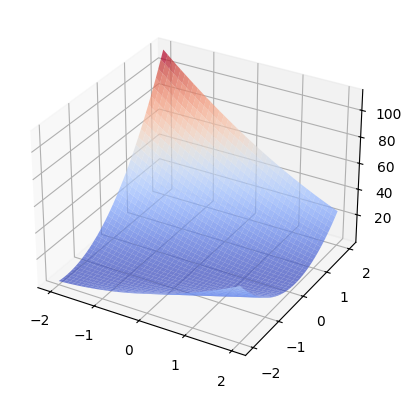

In [15]:
if __name__ == '__main__':
  b = np.array([[1], [2]])
  A = np.array([[1, -2], [1, -2]])
  #show_gradient_descent(A, b)
  draw_gradient_descent(A, b)

In [ ]:
# Try different learning rates of alpha. How to adjust the learning rate for faster speed of convergence? (4%)
# 如何調整 alpha 使得所需迴圈次數愈少愈好(即較快達到收斂)？
# Write down your answer here. 

In [ ]:
# Try different initial points of x. Do different initial points give rise to different to optimal solutions? (4%)
# 不同初始點 x 會使演算法找到不同最佳解嗎?
# Write down your answer here.

In [ ]:
# Does the minimum vary with the values of the initial point? (4%)
# 不同初始點 x 會使演算法找到不同最小值嗎?
# Write down your answer here. 

In [ ]:
# Is the minimum a local minimum or a global minimum? (4%)
# # Write down your answer here. 